In [1]:
%matplotlib inline 
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt

np.random.seed(0)

### Process training and test data

- load data
- split into samples and labels for training and test data

In [2]:
# read data into program

training_dataset = np.load('train.npy')
test_dataset = np.load('test.npy')

In [3]:
# get training data
X_train = training_dataset[()]['train_x']
Y_train = training_dataset[()]['train_labels']

N,D = X_train.shape

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)

X_train shape:  (20000, 8192)
Y_train shape:  (20000,)


In [4]:
# get test data
X_test = test_dataset[()]['test_x']
Y_test = test_dataset[()]['test_labels']

N_test,D_test = X_test.shape

print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_test shape:  (1200, 8192)
Y_test shape:  (1200,)


In [25]:
# sample from training data

# choose how many samples to sample
n_sample_train = 0.1
# get index
idx_train = np.random.choice(N, int(n_sample_train*N), replace=False)

# map index to rows
x_train = X_train[idx_train,:]
y_train = Y_train[idx_train]

# centerize training data
# x_train = x_train - np.mean( x_train, axis=0 )

# deal with labels to -1 and 1
y_train[ y_train <0.5 ] = -1

n,d = x_train.shape

print("choose {} samples from the training set".format(int(n_sample_train*N)))
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print(n,d)

choose 2000 samples from the training set
x_train shape:  (2000, 8192)
y_train shape:  (2000,)
2000 8192


In [26]:
# sample from test data

# choose how many samples to sample
n_sample_test = 0.2
# get index
idx_test = np.random.choice(N_test, int(n_sample_test*N_test), replace=False)

# map index to rows
x_test = X_test[idx_test,:]
y_test = Y_test[idx_test]

# x_test = x_test - np.mean( x_test, axis=0 )

y_test[ y_test<0.5 ] = -1

n_test, d_test = x_test.shape

print("choose {} samples from the test set".format(int(n_sample_test*N_test)))
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)
print(n_test, d_test)

choose 240 samples from the test set
x_test:  (240, 8192)
y_test:  (240,)
240 8192


### Feature Selections
- [x] PCA
- [] SVD

In [23]:
# feature selection using PCA

# cov_training = np.cov( x_train )
# eigenValues_training, eigenVectors_training = np.linalg.eig( cov_training )
# print( eigenValues_training.shape )
# print( eigenVectors_training.shape)

# eigen_ind = eigenValues_training.argsort()[::-1]
# eigenValues_training = eigenValues_training[eigen_ind]
# eigenVectors_training = eigenVectors_training[:, eigen_ind]
# print(eigenValues_training)

(2000,)
(2000, 2000)
[  2.10090625e-01   1.55195644e-01   1.20590379e-01 ...,   2.19310022e-06
   2.08173105e-06   9.67088850e-13]


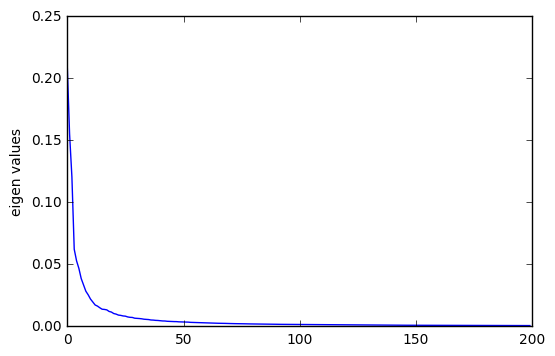

In [22]:
# # draw eigen values
# plt.plot( eigenValues_training[:200] )
# plt.ylabel( "eigen values" )
# plt.show()

In [28]:
# do feature selection using SVD

U, s, V = np.linalg.svd(x_train, full_matrices=False)
print("U", U.shape)
print("s", s.shape)
print("V", V.shape)

U (2000, 2000)
s (2000,)
V (2000, 8192)


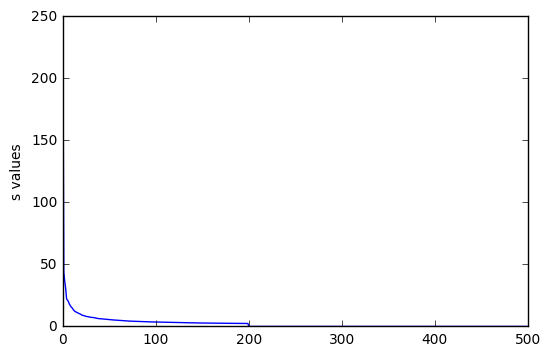

In [40]:
# draw s values
plt.plot( s[:500] )
plt.ylabel( "s values" )
plt.show()

In [31]:
# get new dataset with selected features
n_feature_selection_SVD = 200
s[n_feature_selection_SVD:] = 0
S = np.diag(s)
x_train = U@S@V
print("x_train shape:", x_train.shape)

x_train shape: (2000, 8192)


In [32]:
# get baseline
positive_rate_test = sum(y_test == 1)/n_test
baseline = positive_rate_test if positive_rate_test >= 0.5 else 1-positive_rate_test
print(baseline)

0.508333333333


### experiment on toy dataset

In [ ]:
# # toy training dataset
# dataset = [
#     [1,2,3,4,5],
#     [1,3,4,5,6],
#     [1,3,4,5,3],
#     [1,1,2,3,3],
#     [0,1,5,4,5],
#     [0,3,5,1,3],
#     [0,2,3,5,1]
# ]

# data = np.array(dataset)

In [ ]:
# # split toy training data into samples and labels

# x_train = data[:,1:]
# y_train = data[:,0]

# # get the size of the data
# N,D = x_train.shape

# print("Data has {} samples and {} features".format(N, D))
# print("training data size:", x_train.shape)
# print("training label:", y_train.shape)

In [ ]:
# # test data
# dataset_test = [
#     [1,4,5,63,5],
#     [1,7,22,1,4],
#     [0,3,4,1,5],
#     [0,66,3,2,1]
# ]

# data_test = np.array(dataset_test)

In [ ]:
# # split test data into samples and labels

# x_test = data_test[:,1:]
# y_test = data_test[:,0]

# # get the size of the data
# N_test,D_test = x_test.shape

# print("Data has {} samples and {} features".format(N_test, D_test))
# print("test data size:", x_test.shape)
# print("test label:", y_test.shape)

### Initialize parameters 
- weight
    - mu
    - sigma
- noise

In [33]:
# Initialize Weight
w_mu = np.zeros(d)
w_sigma = np.eye(d)

#Intialize noise
sigma_square = 0.1**2

print("w_mu size:   ", w_mu.shape)
print("w_sigma size:", w_sigma.shape)

w_mu size:    (8192,)
w_sigma size: (8192, 8192)


### posterior

In [34]:
# posterior
w_mu_posterior = w_mu + \
                    w_sigma@x_train.T @ \
                    inv(x_train@w_sigma@x_train.T + sigma_square*np.eye(n)) @ \
                    (y_train - x_train@w_mu)
w_sigma_posterior = w_sigma - \
                    w_sigma@x_train.T @ \
                    inv(x_train@w_sigma@x_train.T + sigma_square*np.eye(n)) @x_train@w_sigma
    
print("w_mu_posterior: ", w_mu_posterior)
print("w_sigma_posterior: ", w_sigma_posterior)

w_mu_posterior:  [-0.00012564  0.00437339 -0.00301731 ...,  0.00265083  0.06652823
  0.00514172]
w_sigma_posterior:  [[  9.99995767e-01   1.54125170e-10   1.64871098e-06 ...,  -2.52096364e-06
    2.22092087e-05   1.03796264e-05]
 [  1.54125173e-10   9.99969824e-01  -3.24820060e-06 ...,  -2.83349004e-06
    1.02156999e-04   9.44733790e-05]
 [  1.64871098e-06  -3.24820060e-06   9.98229152e-01 ...,   7.38126512e-05
    2.73332324e-04   3.83008161e-04]
 ..., 
 [ -2.52096364e-06  -2.83349004e-06   7.38126512e-05 ...,   9.99812377e-01
    5.19889330e-04  -4.82107710e-04]
 [  2.22092087e-05   1.02156999e-04   2.73332324e-04 ...,   5.19889330e-04
    9.41956898e-01  -2.44456948e-02]
 [  1.03796264e-05   9.44733790e-05   3.83008161e-04 ...,  -4.82107710e-04
   -2.44456948e-02   9.78221537e-01]]


### predictions

In [35]:
# prediction
y_star_mu_posterior = x_test@w_mu_posterior
y_star_sigma_posterior = x_test@w_sigma_posterior@x_test.T + \
                            sigma_square*np.eye(n_test)

var = np.sqrt(y_star_sigma_posterior.diagonal())

print("y_star_mu_posterior: ", y_star_mu_posterior)
print("y_star_sigma_posterior: ", y_star_sigma_posterior)
print("var: ", var)

y_star_mu_posterior:  [-0.43437234 -0.22737274  0.00474443 -0.32138411  0.1722181   0.79125813
 -0.04836966  0.22670145  0.12640039  0.40891392 -0.37452413  0.18524706
  0.14606111 -0.39422147  0.87566562 -0.55013629  0.33845586 -0.11592337
 -0.08235394  0.40094615 -1.05972403  0.3091706   0.11635752  1.08097838
  0.32940714 -0.38097364 -0.18640277 -0.11985206 -0.00740874  0.59625806
 -0.24343633  0.14752071 -0.17192651  0.34872624 -0.37877635 -0.17766452
  0.09250141 -0.20053086  0.89328925  0.29056168 -0.05784095  0.41633917
 -0.03086268  0.31237121 -0.01541392 -0.77357461 -0.15560156  0.07999111
 -0.4267197   0.50973439  0.04767839 -0.26964338  0.47769727  0.10454207
 -0.25968244  0.24181997 -0.19721506  0.55780659 -0.19146226 -0.28729161
 -0.22204018 -0.1795401  -0.02040907 -0.07556416  0.11310654 -0.07709241
 -0.08365475  0.00177793 -0.09536339 -0.36247515  0.02984656 -0.32927304
 -0.10959799 -0.55599419 -0.46363094  0.14169036  0.07764367  0.41480241
  0.25417489  0.79310554 -1.1

### experiment on prediction result

In [36]:
# fixed threshold

# get the prediction
threshold = 0

predictions = y_star_mu_posterior.copy()
predictions[ predictions<threshold ] = -1
predictions[ predictions>=threshold ] = 1

# compare predictions to true label
n_correct = sum(predictions == y_test)

print("accuaracy = ", n_correct/n_test)

accuaracy =  0.608333333333


In [37]:
# find best threshold
max_correct, best_threshold = 0, 0
record_correct = []
for threshold in np.arange(-2,2,0.1):
    predictions = y_star_mu_posterior.copy()
    predictions[ predictions<threshold ] = -1
    predictions[ predictions>=threshold ] = 1
    n_correct = sum(predictions == y_test)
    record_correct.append( n_correct )
    if n_correct > max_correct:
        max_correct = n_correct
        best_threshold = threshold
    
record_correct = np.array( record_correct )
print( "best accuracy is : ", max_correct/n_test )
print( "best threshold is: ", best_threshold )

best accuracy is :  0.608333333333
best threshold is:  1.7763568394e-15


[604 604 604 604 604 604 604 604 604 604 590 592 587 598 601 616 607 618
 624 625 629 630 641 639 635 635 638 637 635 630 629 620 618 620 624 630
 628 629 625 625]


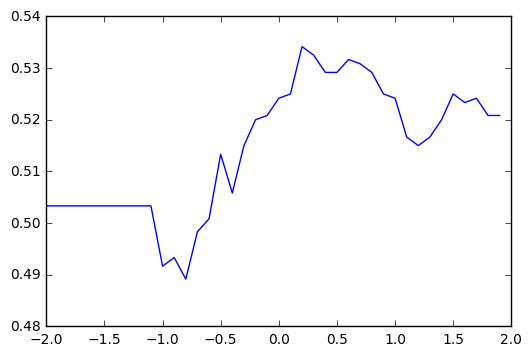

In [103]:
# plot record of correctness w.r.t threshold
print(record_correct)
# print(record_correct)
plt.plot(np.arange(-2,2,0.1), record_correct/n_test)

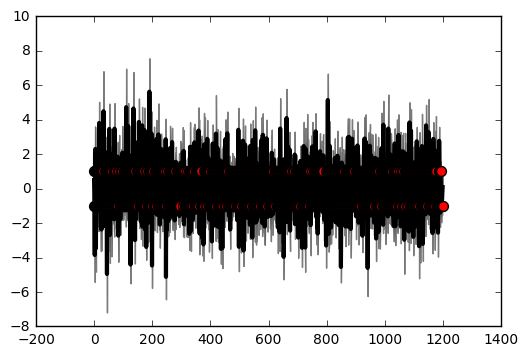

In [92]:
# plot
x_index = [i for i in range(n_test)]
plt.scatter(x_index, y_test, c='r', s=50, zorder=10)
plt.plot(x_index, y_star_mu_posterior,'k', lw=3, zorder=9)
plt.fill_between(x_index, y_star_mu_posterior - 2*var, y_star_mu_posterior + 2*var, alpha=0.5, color='k')